## Project for Advanced Data Science course
#### Loay Abdulatif & Sharef Mustafa


### We are investigating the possibility of detecting spam via meta data instead of disclosing the content of the message it self

### The motivation here is ethical , as usual methodologies used in anti spaming will check the contents of the message it self and thus violating people privacy

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## we start with parsing the log of a mail server as seen below this is a labled data since each row is representing an incoming email and the column 'Type' already classifies the email based on a commercial anti spam system

In [24]:
df = pd.read_csv('maildata.csv', error_bad_lines=False)
df.head(3)

,Date,Msg Id,Client Address,Type,Score,From,To,Subject,Size,Virus Details
0,5/11/2017 15:29,iJ1kYuEy-K0f,98.139.213.152,Clean,0.340,XXXXXXX@bellsouth.net,######@targetdomain.com,Second request كشف حساب ٢٠١٦,4331,NaN
1,5/11/2017 11:59,wXfZtBvH8F7S,98.139.213.148,Clean,-1.918,NaN,######@targetdomain.com,Delivery failure,5204,NaN
2,5/11/2017 15:15,POvVNhEZbKTS,98.138.121.119,Clean,-2.089,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4395,NaN


In [25]:
# pepare the data for modeling, "Client Address" text column will be replaced by 4 numerical
# columns representing the 4 octets of the IP address
b1 = []
b2 = []
b3 = []
b4 = []

for i in df['Client Address']:
    ip = str(i).split('.')
    b1.append(ip[0])
    b2.append(ip[1])
    b3.append(ip[2])
    b4.append(ip[3])
df['b1'] = pd.Series(b1)
df['b2'] = pd.Series(b2)
df['b3'] = pd.Series(b3)
df['b4'] = pd.Series(b4)

df.drop('Client Address',1, inplace=True)

# replace Date column with a numerical column of index numbers 
df['Index'] = np.arange(len(df))
df.drop('Date',1, inplace=True)

#drop irrelavent columns 
df.drop('Virus Details',1, inplace=True)
df.drop('Msg Id',1, inplace=True)
df.dropna()

# prepare the target column 'Spam' by replacing 6text values with 0|1 representing Ham|Spam respectivly
# drop 'Type' column afterwarsd
df['Spam'] = pd.Series( [ 0 if(str(i)=='Clean' or str(i)=='Whitelisted') else 1 for i in df['Type'] ])
df.drop('Type',1, inplace=True)

In [26]:
df.head(3)

,Score,From,To,Subject,Size,b1,b2,b3,b4,Index,Spam
0,0.340,XXXXXXX@bellsouth.net,######@targetdomain.com,Second request كشف حساب ٢٠١٦,4331,98,139,213,152,0,0
1,-1.918,NaN,######@targetdomain.com,Delivery failure,5204,98,139,213,148,1,0
2,-2.089,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4395,98,138,121,119,2,0


## from the above we see that some critical columns are still in text and can not be replaced by numerical values, so we will use the numerical features only for now

In [27]:
X = df [['Index', 'Size', 'b1', 'b2', 'b3', 'b4']]
y = df['Spam']


In [28]:
X.head(2)

,Index,Size,b1,b2,b3,b4
0,0,4331,98,139,213,152
1,1,5204,98,139,213,148


In [29]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Splitting & Fitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [31]:
Y = knn.predict(X_test)

In [32]:
accuricy = metrics.accuracy_score(y_test, Y)

In [33]:
print (accuricy)

0.97


### to verify accuracy more precisely, we will use cross validation

In [34]:
from sklearn.cross_validation import cross_val_score


In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy' )

In [36]:
print(scores)

[ 0.9800995   0.98507463  0.85572139  1.          0.995       0.995
  0.99497487  1.          0.98492462  0.90954774]


In [37]:
print (scores.mean())

0.970034275857


In [38]:
kscores = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy' )
    kscores.append(scores.mean())
print(kscores)

[0.94647874946873678, 0.97103678841971042, 0.96652668816720411, 0.97254432610815267, 0.9700342758568965, 0.97304683867096675, 0.97304683867096675, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213]


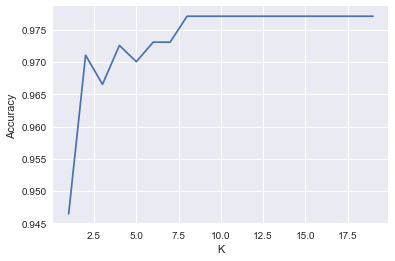

In [39]:
plt.plot(range(1,20) , kscores)
plt.xlabel("K")
plt.ylabel('Accuracy')

## initially we will chose k=8 or above
## next step is to compare results with Logestic Regression
